<a href="https://www.kaggle.com/code/alfredkondoro/tbmanfis-rf-xgb-naivebayes?scriptVersionId=167963087" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [2]:
dataset = pd.read_csv("/kaggle/input/tbm-anfis-pnn-ica/TBM_ANFIS-PNN-ICA.csv", index_col=0)
dataset.head(5)

,RQD (%),UCS (MPa),RMR,BTS (MPa),TF (KN),RPM (rev/min),PR (m/h)
1,65.00,105.0,73.5,7.56,195.22,7.53,2.51
2,61.25,130.0,65.0,7.56,248.92,7.30,2.22
3,92.50,150.0,65.0,12.56,280.05,5.98,1.99
4,57.50,85.0,56.0,7.56,266.72,8.28,2.96
5,57.50,90.0,65.0,7.56,295.97,10.96,2.85


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 209 entries, 1 to 209
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   RQD (%)        209 non-null    float64
 1   UCS (MPa)      209 non-null    float64
 2   RMR            209 non-null    float64
 3   BTS (MPa)      209 non-null    float64
 4   TF (KN)        209 non-null    float64
 5   RPM (rev/min)  209 non-null    float64
 6   PR (m/h)       209 non-null    float64
dtypes: float64(7)
memory usage: 13.1 KB


In [4]:
data = np.array(dataset.iloc[:,:-1])
target = np.array(dataset.iloc[:,-1]).reshape(-1,1)
print(data.shape)
print(target.shape)

(209, 6)
(209, 1)


In [5]:
X_train,X_test,y_train,y_test = train_test_split(data,target,test_size=0.3,random_state=7)

In [6]:
!pip install flaml

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.7/296.7 kB 4.2 MB/s eta 0:00:00


In [7]:
from flaml import AutoML
automl = AutoML()

2024-03-20 11:01:40,201	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-03-20 11:01:41,263	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


In [8]:
automl.fit(X_train, y_train, task="regression",metric='r2',time_budget=60)

[flaml.automl.logger: 03-20 11:01:45] {1680} INFO - task = regression
[flaml.automl.logger: 03-20 11:01:45] {1691} INFO - Evaluation method: cv
[flaml.automl.logger: 03-20 11:01:45] {1789} INFO - Minimizing error metric: 1-r2
[flaml.automl.logger: 03-20 11:01:45] {1901} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'catboost', 'xgboost', 'extra_tree', 'xgb_limitdepth']
[flaml.automl.logger: 03-20 11:01:45] {2219} INFO - iteration 0, current learner lgbm
[flaml.automl.logger: 03-20 11:01:45] {2345} INFO - Estimated sufficient time budget=876s. Estimated necessary time budget=7s.
[flaml.automl.logger: 03-20 11:01:45] {2392} INFO -  at 0.4s,	estimator lgbm's best error=0.5261,	best estimator lgbm's best error=0.5261
[flaml.automl.logger: 03-20 11:01:45] {2219} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 03-20 11:01:45] {2392} INFO -  at 0.5s,	estimator lgbm's best error=0.5261,	best estimator lgbm's best error=0.5261
[flaml.automl.logger: 03-20 11:01:45] {221

In [9]:
print('Best ML leaner:', automl.best_estimator)
print('Best hyperparmeter config:', automl.best_config)
print('Best log_loss on validation data: {0:.4g}'.format(automl.best_loss))
print('Training duration of best run: {0:.4g} s'.format(automl.best_config_train_time))

Best ML leaner: extra_tree
Best hyperparmeter config: {'n_estimators': 24, 'max_features': 0.5612397749836915, 'max_leaves': 32}
Best log_loss on validation data: 0.07593
Training duration of best run: 0.04702 s


In [10]:
model_x = automl.model
pred = model_x.predict(X_test)
pred = pred.reshape(-1,1)

for (p,y) in zip(pred,y_test):
    print(f'Prediction of PR "{p[0]:0.5}" & actual PR "{y[0]}"')

Prediction of PR "1.9825" & actual PR "2.01"
Prediction of PR "2.576" & actual PR "2.67"
Prediction of PR "2.1131" & actual PR "2.07"
Prediction of PR "3.2514" & actual PR "3.13"
Prediction of PR "1.807" & actual PR "1.76"
Prediction of PR "1.8712" & actual PR "1.71"
Prediction of PR "2.8844" & actual PR "2.72"
Prediction of PR "2.0278" & actual PR "1.99"
Prediction of PR "1.9464" & actual PR "1.97"
Prediction of PR "2.4537" & actual PR "2.3"
Prediction of PR "1.733" & actual PR "1.78"
Prediction of PR "2.0068" & actual PR "2.02"
Prediction of PR "2.5132" & actual PR "2.33"
Prediction of PR "2.3994" & actual PR "2.27"
Prediction of PR "2.5306" & actual PR "2.28"
Prediction of PR "1.3545" & actual PR "1.34"
Prediction of PR "3.0855" & actual PR "3.36"
Prediction of PR "1.4838" & actual PR "1.73"
Prediction of PR "3.2649" & actual PR "3.04"
Prediction of PR "3.1928" & actual PR "3.24"
Prediction of PR "2.6302" & actual PR "2.66"
Prediction of PR "3.1204" & actual PR "3.23"
Prediction of 

In [11]:
print(f'COD(R2) : {model_x.score(X_test,y_test):0.5}')

COD(R2) : 0.94968


Text(0, 0.5, 'True PR')

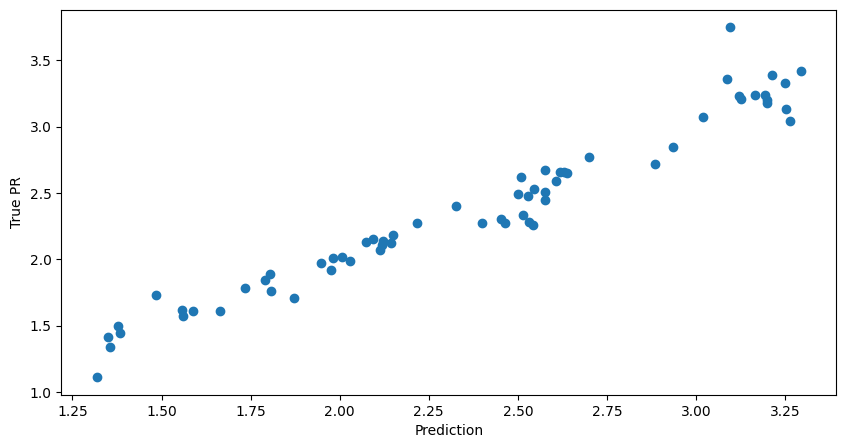

In [12]:
plt.figure(figsize=(10,5))
plt.plot(pred,y_test,'o')
plt.xlabel('Prediction')
plt.ylabel('True PR')

# Model 1 - RandomForestRegressor

In [13]:
import optuna
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor

In [14]:
#random forest model without optimization
model_1 = RandomForestRegressor().fit(X_train, y_train)
y_pred = model_1.predict(X_test)
r2 = r2_score(y_test, y_pred)
r2

/tmp/ipykernel_18/340875830.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_1 = RandomForestRegressor().fit(X_train, y_train)


0.944440117087969

In [15]:
#random forest model after optimization
from sklearn.model_selection import GridSearchCV

y_train = y_train.ravel()

param_grid = {
    'n_estimators': [0,10, 50, 100],
    'max_depth': [0, 2, 4, 8, 16, 32],
    'min_samples_split': [0, 2, 5, 10],
    'min_samples_leaf': [0, 1, 2, 4],
    'max_features': [0, 0.1, 0.3, 0.5, 0.7, 1.0]
}

enhanced_model_1 = RandomForestRegressor(random_state=100)
grid_search = GridSearchCV(estimator=enhanced_model_1, param_grid=param_grid, scoring='r2', cv=5)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
8145 fits failed out of a total of 11520.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1920 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/opt/conda/lib/python3.10/site-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/opt/conda/lib/python3.10/site-packages/sklear

R-squared: 0.944720989109113


# Model 2 - XGBOOST

In [16]:
#xgboost model without optimization
from xgboost import XGBRegressor

model_2 = XGBRegressor().fit(X_train, y_train)
y_pred = model_2.predict(X_test)
r2 = r2_score(y_test, y_pred)
r2

0.9349949458520332

In [17]:
#xgboost model after optimization
y_train = y_train.ravel()

param_grid = {
    'n_estimators': [0, 10, 50, 100],
    'max_depth': [0, 2, 4, 8, 16],
    'learning_rate': [0, 0.01, 0.1, 0.3],
    'subsample': [0, 0.5, 0.7, 1.0],
    'colsample_bytree': [0, 0.5, 0.7, 1.0],
    'gamma': [0, 0.1, 0.3],
    'reg_alpha': [0, 0.1, 0.3],
    'reg_lambda': [0, 0.1, 0.3]
}

enhanced_model_2 = XGBRegressor(random_state=100)
grid_search = GridSearchCV(estimator=enhanced_model_2, param_grid=param_grid, scoring='r2', cv=5)
grid_search.fit(X_train, y_train)

best_model_2 = grid_search.best_estimator_
y_pred = best_model_2.predict(X_test)

r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

R-squared: 0.9454802511632046


# Model 3 - Naive Bayes

In [18]:
from sklearn.linear_model import BayesianRidge

model_3 = BayesianRidge().fit(X_train, y_train)
y_pred = model_3.predict(X_test)
r2 = r2_score(y_test, y_pred)
r2

0.9364100772361731

In [19]:
y_train = y_train.ravel()

param_grid = {
    'n_iter': [0, 100, 200, 300],
    'alpha_1': [0, 1e-6, 1e-5, 1e-4],
    'alpha_2': [0, 1e-6, 1e-5, 1e-4],
    'lambda_1': [0, 1e-6, 1e-5, 1e-4],
    'lambda_2': [0, 1e-6, 1e-5, 1e-4],
}

enhanced_model_3 = BayesianRidge()
grid_search = GridSearchCV(estimator=enhanced_model_3, param_grid=param_grid, scoring='r2', cv=5)


grid_search.fit(X_train, y_train)
best_model_3 = grid_search.best_estimator_
y_pred = best_model_3.predict(X_test)

r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

R-squared: 0.9361498664663165


/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
1280 fits failed out of a total of 5120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1280 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_bayes.py", line 229, in fit
    self._validate_params()
  File "/opt/conda/lib/python3.10/site-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/opt/conda/lib/python3.10/site-packages/skle

# Addition Model - Keras

In [20]:
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

2024-03-20 11:58:39.089067: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-20 11:58:39.089207: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-20 11:58:39.285340: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [21]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = Sequential([
    Dense(64, activation='relu', input_shape=(6,)),
    Dense(32, activation='relu'),
    Dense(1) 
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=1, validation_split=0.2)

y_pred = model.predict(X_test_scaled)

r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

Epoch 1/100


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - loss: 6.1657 - mae: 2.4311 - val_loss: 4.8066 - val_mae: 2.1472
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 5.4431 - mae: 2.2822 - val_loss: 3.9924 - val_mae: 1.9398
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 4.5529 - mae: 2.0578 - val_loss: 3.2846 - val_mae: 1.7336
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 3.8355 - mae: 1.8558 - val_loss: 2.6859 - val_mae: 1.5337
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 3.5157 - mae: 1.7726 - val_loss: 2.1757 - val_mae: 1.3466
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 2.8352 - mae: 1.5263 - val_loss: 1.7401 - val_mae: 1.1815
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 2.3534 - mae: 1.3882 - val_loss: 1.3627 - val_mae: 1.0307
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 2.0410 - mae: 1.2892 - val_loss: 1.0497 - val_mae: 0.8956
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.5894 - mae: 1.1466 - val